In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=100, centers=3, random_state=42)

In [4]:
Y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

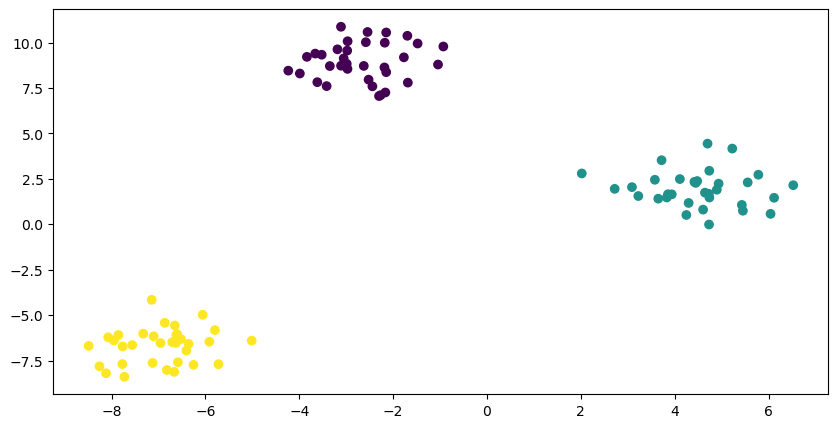

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:,0], X[:, 1], c=Y)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
#elbow method to select k values
wcss = []

for i  in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X_train_scaled)
    
    wcss.append(kmeans.inertia_)

C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

In [13]:
wcss

[134.00000000000003,
 49.507300418772715,
 4.320733105823518,
 3.709773857207394,
 3.294917570277984,
 2.5950593135173436,
 2.332524634163105,
 1.9638497781099629,
 1.6706000913343177,
 1.378949502308449]

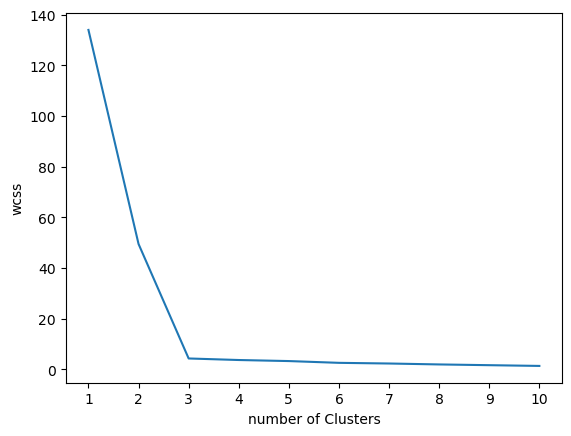

In [14]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("number of Clusters")
plt.ylabel("wcss")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit_predict(X_train_scaled)

C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1,
       0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2,
       0])

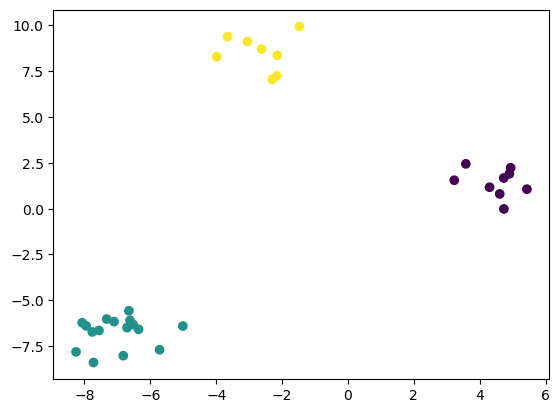

In [22]:

y_pred = kmeans.predict(X_test_scaled)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

In [23]:
# validating k value with kneelocator
# kneelocator

!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [25]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve= "convex", direction = "decreasing")


In [27]:
kl.elbow

3

In [28]:
# silhoutte scoreing

from sklearn.metrics import silhouette_score
silhoutte_score = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhoutte_score.append(score)

C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

In [31]:
silhoutte_score

[0.5061835913332068,
 0.8376879386226517,
 0.6952051364201786,
 0.4705405660087537,
 0.330362274353381,
 0.46457749439377183,
 0.3544352046646128,
 0.34156429438531444,
 0.36559878199943024]

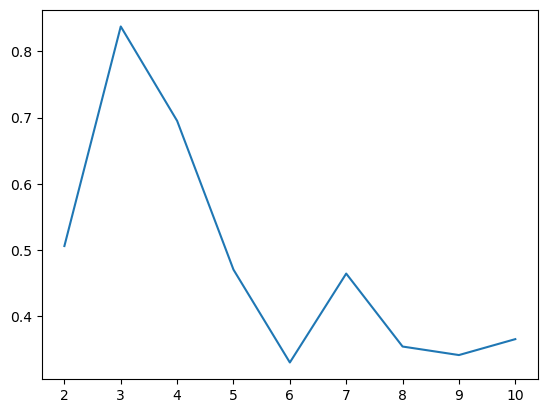

In [33]:
plt.plot(range(2, 11), silhoutte_score)